In [1]:
# https://www.kaggle.com/uciml/pima-indians-diabetes-database
import pandas as pd
colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
demo = pd.read_csv("pima-indians-diabetes.data", names= colnames)
X=demo.drop('class',axis=1)
y=demo['class']
demo.head()

preg  plas  pres  skin  test  mass   pedi  age  class
0     6   148    72    35     0  33.6  0.627   50      1
1     1    85    66    29     0  26.6  0.351   31      0
2     8   183    64     0     0  23.3  0.672   32      1
3     1    89    66    23    94  28.1  0.167   21      0
4     0   137    40    35   168  43.1  2.288   33      1

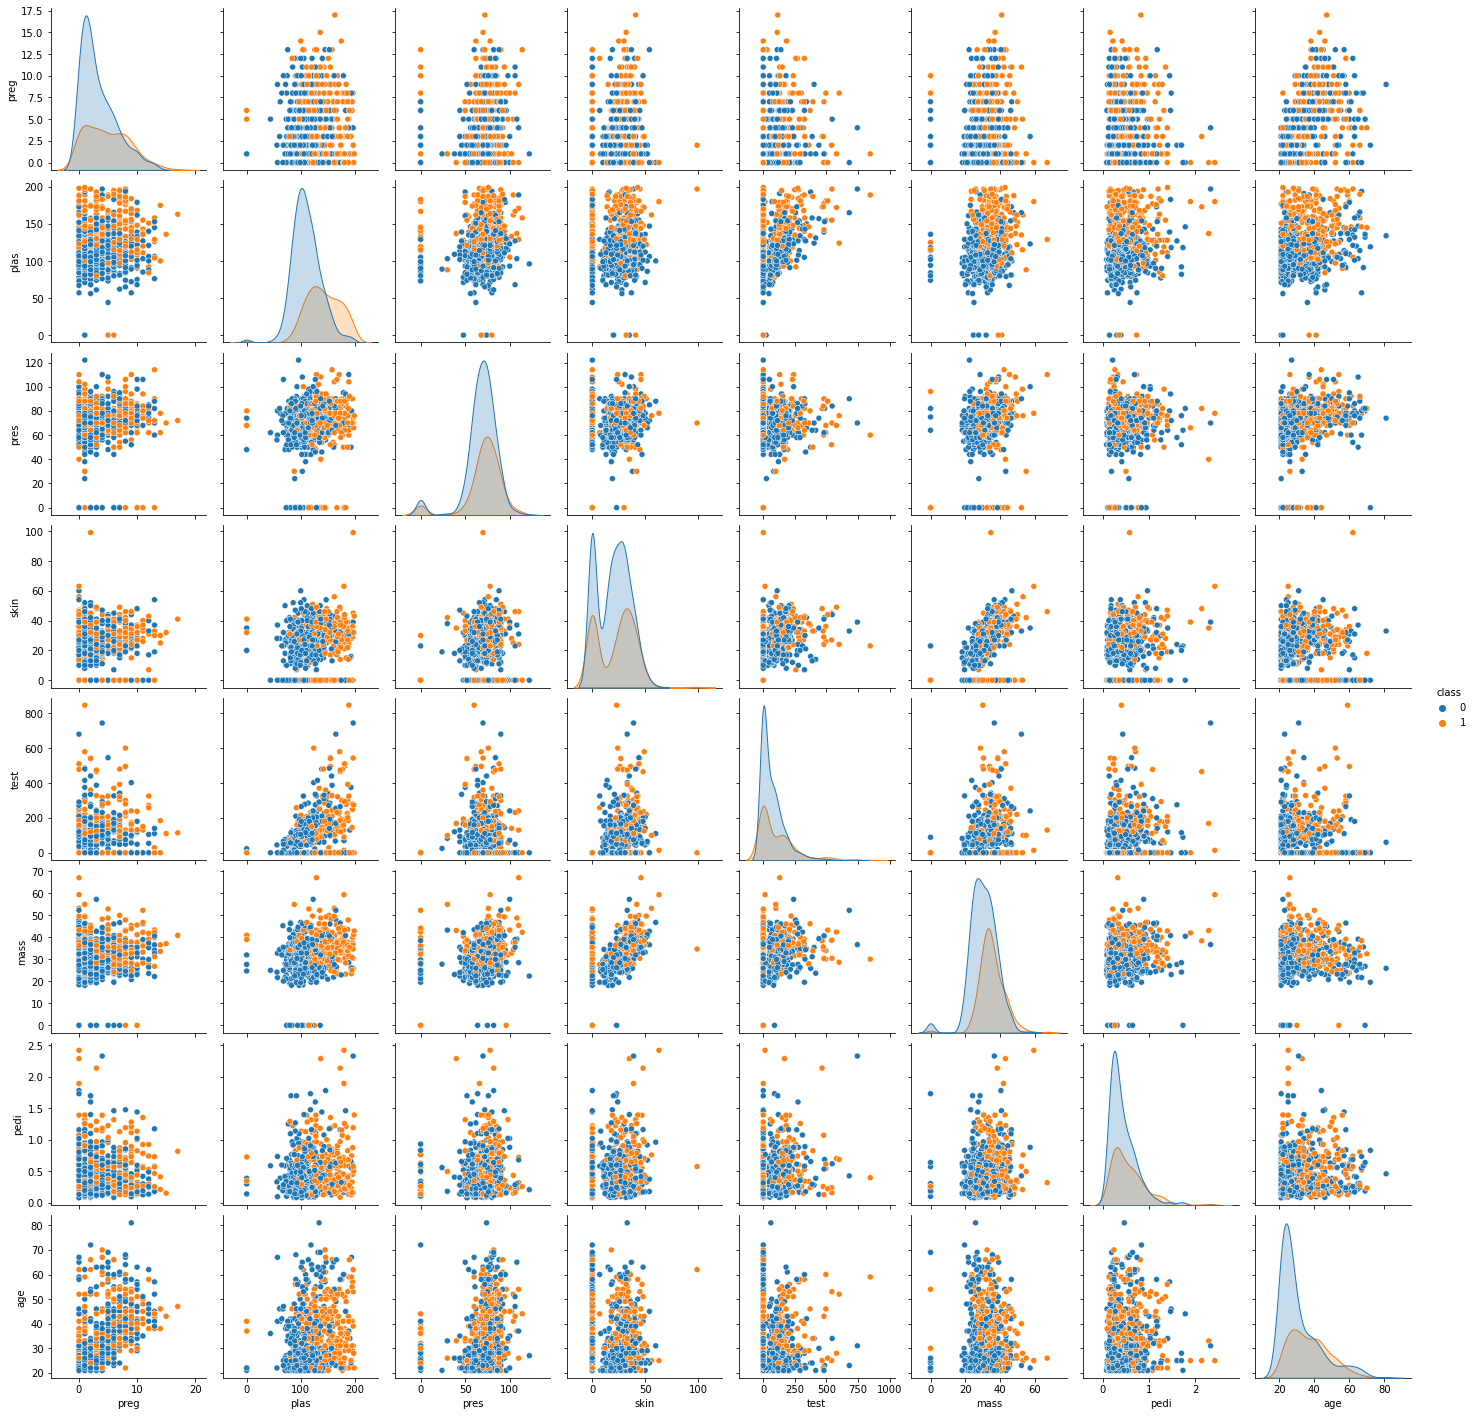

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.pairplot(demo,diag_kind='kde',hue='class')

In [3]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X,y)
gb.feature_importances_

array([0.05236674, 0.40877786, 0.03665616, 0.01776377, 0.04880025,
       0.19354863, 0.10477116, 0.13731543])

In [4]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=20)
sc=StandardScaler()
scaledxtrain = sc.fit_transform(X_train)
scaledxtest = sc.transform(X_test)
lr = LogisticRegression()
lr.fit(scaledxtrain,y_train)
print("What is the Testing Accuracy")
print(lr.score(scaledxtest,y_test))
print("What is the Training Accuracy")
print(lr.score(scaledxtrain,y_train))

What is the Testing Accuracy
0.7532467532467533
What is the Training Accuracy
0.7850162866449512


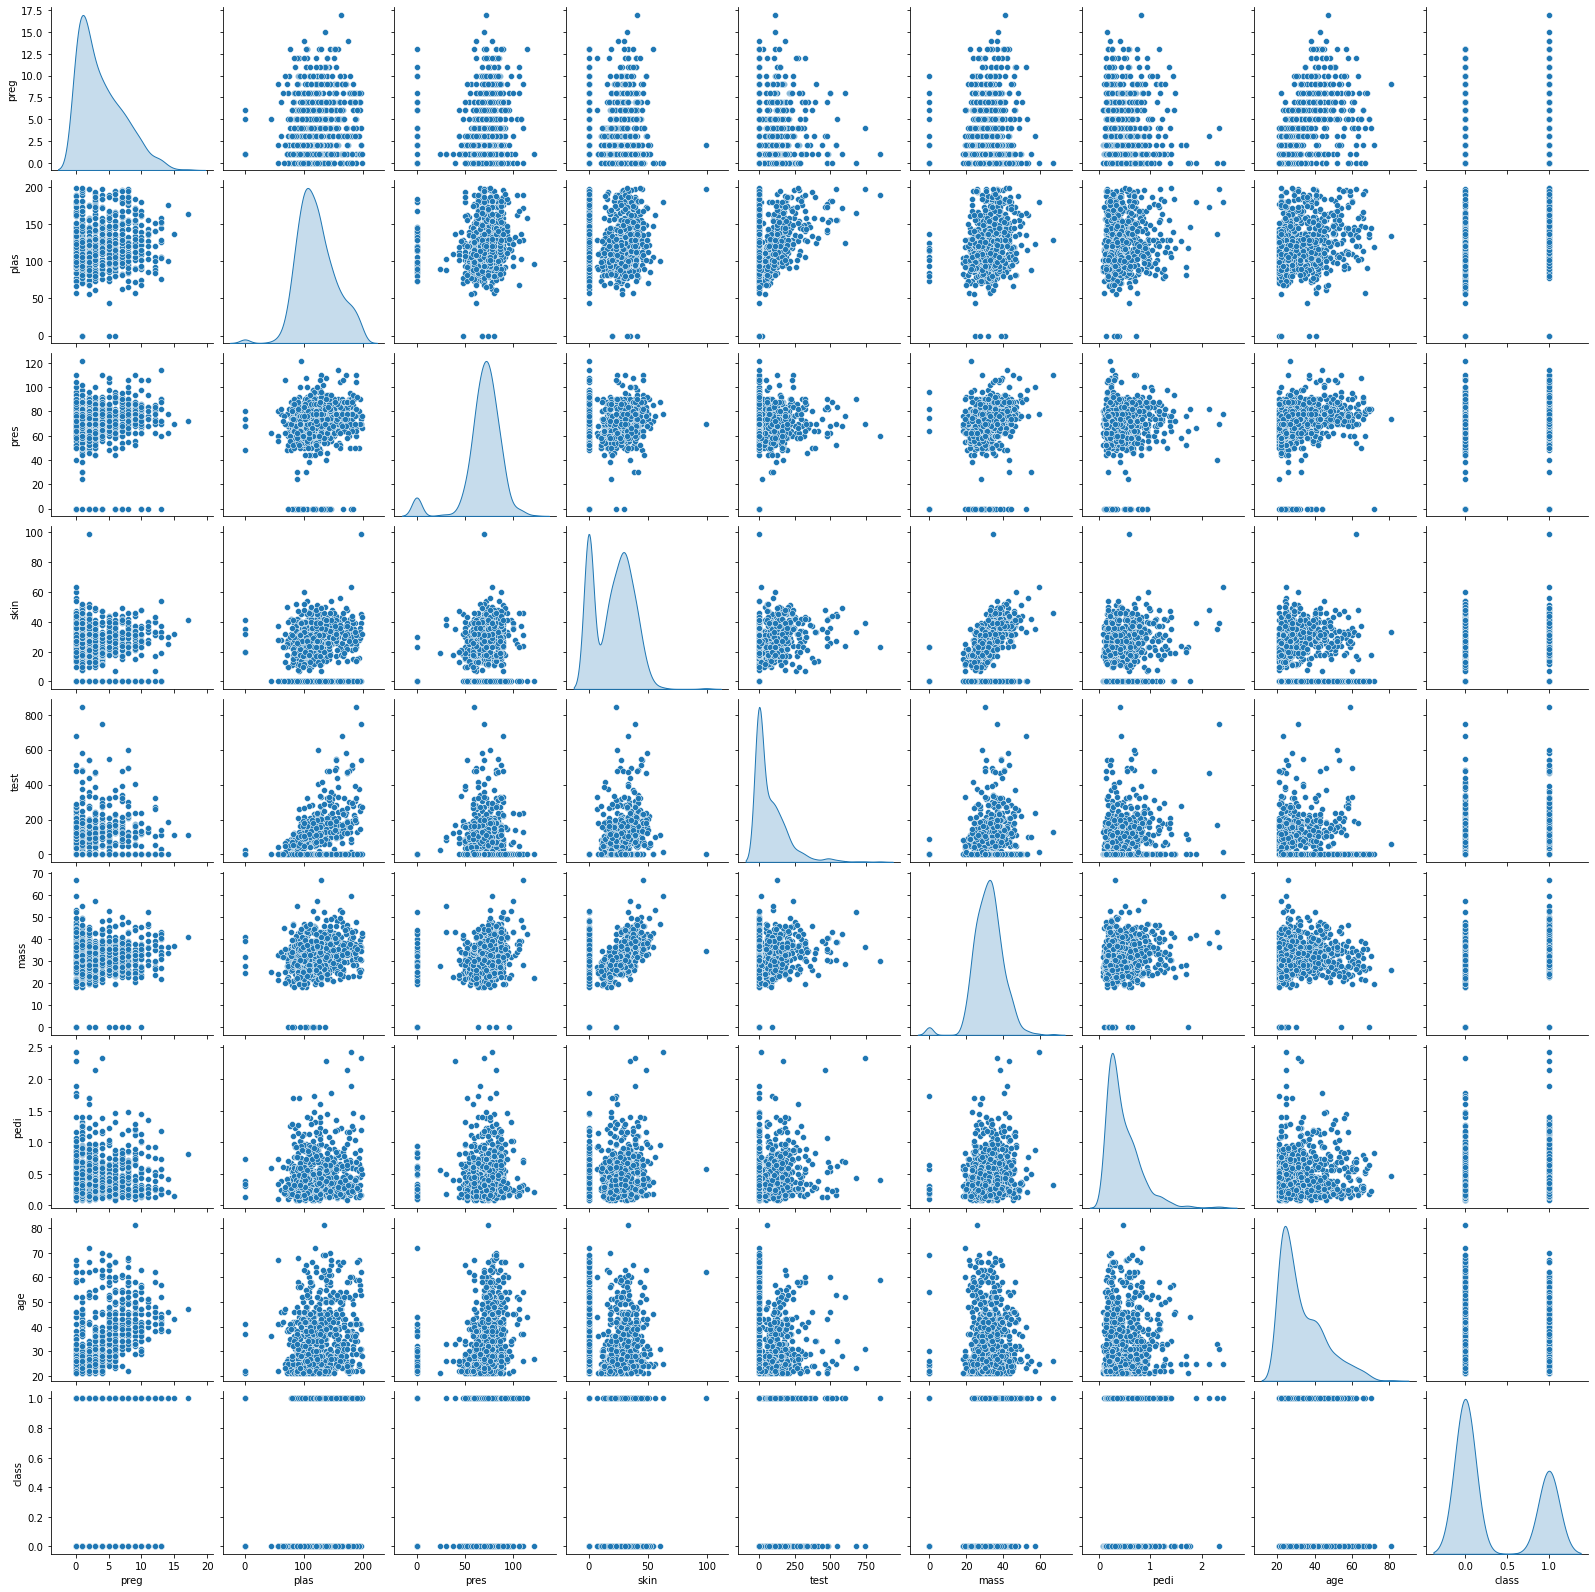

In [6]:
sns.pairplot(demo,diag_kind='kde')

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=20)
pt = PowerTransformer()
powerxtrain = pt.fit_transform(X_train)
powerxtest = pt.transform(X_test)
sc=StandardScaler()
scaledxtrain = sc.fit_transform(powerxtrain)
scaledxtest = sc.transform(powerxtest)
lr = LogisticRegression()
lr.fit(scaledxtrain,y_train)
print("What is the Testing Accuracy")
print(lr.score(scaledxtest,y_test))
print("What is the Training Accuracy")
print(lr.score(scaledxtrain,y_train))

What is the Testing Accuracy
0.7467532467532467
What is the Training Accuracy
0.7801302931596091


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=20)
pt = PowerTransformer()
powerxtrain = pt.fit_transform(X_train)
powerxtest = pt.transform(X_test)
lr = LogisticRegression()
lr.fit(powerxtrain,y_train)
print("What is the Testing Accuracy")
print(lr.score(powerxtest,y_test))
print("What is the Training Accuracy")
print(lr.score(powerxtrain,y_train))

What is the Testing Accuracy
0.7467532467532467
What is the Training Accuracy
0.7801302931596091


In [9]:
X_train.skew()

preg    0.962080
plas    0.270962
pres   -1.934003
skin    0.095105
test    2.149186
mass   -0.535281
pedi    1.802860
age     1.171553
dtype: float64

In [10]:
pd.DataFrame(powerxtrain).skew()

0   -0.040621
1    0.138084
2   -0.503887
3   -0.474604
4    0.031954
5    0.159363
6    0.139538
7    0.158852
dtype: float64

In [11]:
pt.lambdas_

array([ 0.16926381,  0.90461531,  1.65460724,  0.53978975, -0.02085974,
        1.31915951, -2.14318245, -1.22212598])

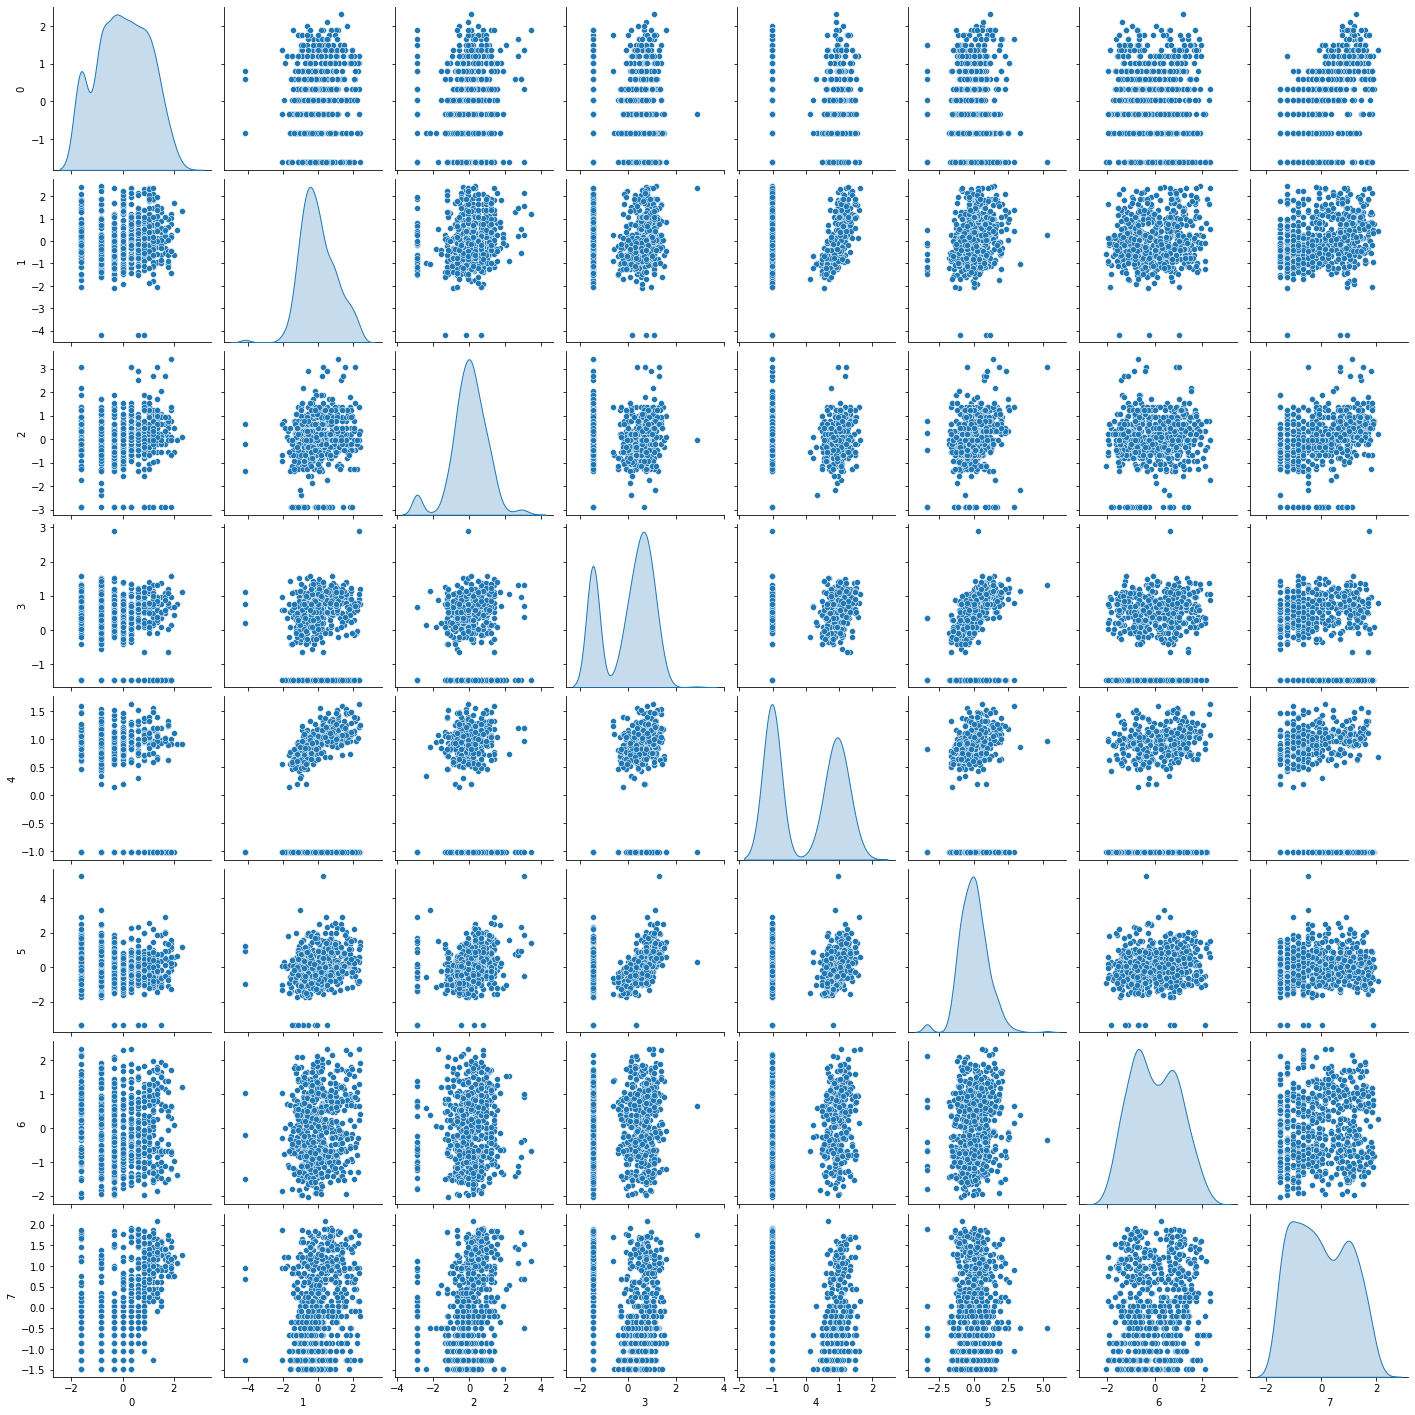

In [12]:
sns.pairplot(pd.DataFrame(powerxtrain),diag_kind='kde')

In [13]:
# https://www.kaggle.com/uciml/pima-indians-diabetes-database
import pandas as pd
colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
demo = pd.read_csv("pima-indians-diabetes.data", names= colnames)
X=demo.drop('class',axis=1)
y=demo['class']
demo.head()

preg  plas  pres  skin  test  mass   pedi  age  class
0     6   148    72    35     0  33.6  0.627   50      1
1     1    85    66    29     0  26.6  0.351   31      0
2     8   183    64     0     0  23.3  0.672   32      1
3     1    89    66    23    94  28.1  0.167   21      0
4     0   137    40    35   168  43.1  2.288   33      1

In [14]:
demo.describe()

preg        plas        pres        skin        test        mass  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

             pedi         age       class  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%      0.372500   29.000000    0.000000  
75%      0.626250   41.000000    1.000000  
max      2.420000   81.000000    1.000000

In [15]:
#Convert '0' plasma to np.nan. Then apply iterativeimputer

In [16]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [17]:
import numpy as np
demo['plas'].replace(0, np.nan,inplace=True)
demo['pres'].replace(0, np.nan,inplace=True)

In [18]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    763 non-null    float64
 2   pres    733 non-null    float64
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 54.1 KB


In [19]:
#Missing Values with Iterative Imputer
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
X=demo.drop('class',axis=1)
y=demo['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=20)
it=IterativeImputer()
itXtrain = pd.DataFrame(it.fit_transform(X_train))
itXtest = pd.DataFrame(it.transform(X_test))
pt = PowerTransformer()
powerxtrain = pt.fit_transform(itXtrain)
powerxtest = pt.transform(itXtest)
sc=StandardScaler()
scaledxtrain = sc.fit_transform(powerxtrain)
scaledxtest = sc.transform(powerxtest)
lr = LogisticRegression()
lr.fit(scaledxtrain,y_train)
print("What is the Testing Accuracy")
print(lr.score(scaledxtest,y_test))
print("What is the Training Accuracy")
print(lr.score(scaledxtrain,y_train))

What is the Testing Accuracy
0.7662337662337663
What is the Training Accuracy
0.7752442996742671


In [20]:
#With Pipeline
from sklearn.pipeline import Pipeline
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=20)
pipe = Pipeline((
("it", IterativeImputer()),
("pt",PowerTransformer()),
("lr", LogisticRegression()),
))
pipe.fit(X_train,y_train)
print("Testing Accuracy")
print(pipe.score(X_test,y_test))
print("Training Accuracy")
print(pipe.score(X_train,y_train))

Testing Accuracy
0.7662337662337663
Training Accuracy
0.7752442996742671


In [21]:
#Including RFE
#With Pipeline
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE,SelectFromModel,SelectKBest,f_classif
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
pipe = Pipeline((
("it", IterativeImputer()),
("pt",PowerTransformer()),
("fs",SelectKBest(f_classif, k=2)),
("lr", LogisticRegression()),
))
pipe.fit(X_train,y_train)
print("Testing Accuracy")
print(pipe.score(X_test,y_test))
print("Training Accuracy")
print(pipe.score(X_train,y_train))

Testing Accuracy
0.7597402597402597
Training Accuracy
0.7719869706840391


In [22]:
#Including RFE
#With Pipeline
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE,SelectFromModel,SelectKBest,f_classif
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
pipe = Pipeline((
("it", IterativeImputer()),
("pt",PowerTransformer()),
("fs",SelectFromModel(gb,max_features=2)),
("lr", LogisticRegression()),
))
pipe.fit(X_train,y_train)
print("Testing Accuracy")
print(pipe.score(X_test,y_test))
print("Training Accuracy")
print(pipe.score(X_train,y_train))

Testing Accuracy
0.7597402597402597
Training Accuracy
0.7719869706840391


In [23]:
pipe.named_steps['lr'].coef_

array([[1.1689187 , 0.61862755]])

In [24]:
colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
demo = pd.read_csv("pima-indians-diabetes.data", names= colnames)
X=demo.drop('class',axis=1)
y=demo['class']
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X,y)
rf.feature_importances_

array([0.09332114, 0.2560052 , 0.08836771, 0.07104256, 0.07143213,
       0.15837073, 0.12346599, 0.13799453])

In [25]:
colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
demo = pd.read_csv("pima-indians-diabetes.data", names= colnames)
X = demo.drop('class',axis=1)
y = demo['class']
#Find out p-value for plasma and blood pressure feature
import scipy.stats as stats
plasdiabetes = demo[demo['class']==1]['plas']
plasnondiabetes = demo[demo['class']==0]['plas']
print(stats.ttest_ind(plasdiabetes,plasnondiabetes))
bpdiabetes = demo[demo['class']==1]['pres']
bpnondiabetes = demo[demo['class']==0]['pres']
print(stats.ttest_ind(bpdiabetes,bpnondiabetes))
print()

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
skb = SelectKBest(f_classif,k=8)
skb.fit_transform(X,y)
print(skb.pvalues_)

Ttest_indResult(statistic=14.600060005973894, pvalue=8.935431645289913e-43)
Ttest_indResult(statistic=1.8047023017353887, pvalue=0.07151390009776082)

[5.06512730e-10 8.93543165e-43 7.15139001e-02 3.83477048e-02
 2.86186460e-04 1.22980749e-16 1.25460701e-06 2.20997546e-11]


In [26]:
#Including SelectKBest
#With Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
pipe = Pipeline((
("it", IterativeImputer()),
("pt",PowerTransformer()),
("sc", StandardScaler()),
("skb",SelectKBest(f_classif,k=3)),
("lr", LogisticRegression()),
))
pipe.fit(X_train,y_train)
print("Testing Accuracy")
print(pipe.score(X_test,y_test))
print("Training Accuracy")
print(pipe.score(X_train,y_train))

Testing Accuracy
0.7727272727272727
Training Accuracy
0.7719869706840391


In [27]:
predicted = pipe.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report,recall_score,precision_score,f1_score
print(confusion_matrix(y_test,predicted))
print(classification_report(y_test,predicted))

[[88 13]
 [22 31]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       101
           1       0.70      0.58      0.64        53

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.74       154
weighted avg       0.77      0.77      0.77       154



In [28]:
print(recall_score(y_test,predicted,average=None))
print(precision_score(y_test,predicted,average=None))
print(f1_score(y_test,predicted,average=None))

[0.87128713 0.58490566]
[0.8        0.70454545]
[0.83412322 0.63917526]


In [29]:
f1_score(y_test,predicted,average=None)[1]

0.6391752577319587

In [30]:
#Evaluating models using Cross Validation
from sklearn.model_selection import cross_val_score
scoreslr = cross_val_score(pipe, X_train, y_train, cv=10, scoring='accuracy')
print(scoreslr)

[0.75806452 0.77419355 0.83870968 0.77419355 0.86885246 0.67213115
 0.73770492 0.73770492 0.72131148 0.78688525]


In [31]:
import numpy as np
print("Average Accuracy of my model")
print(np.mean(scoreslr))
print("SD of accuracy of the model")
print(np.std(scoreslr,ddof=1))

Average Accuracy of my model
0.7669751454257006
SD of accuracy of the model
0.05666558755854433


In [32]:
# 95% Confidence Interval of Accuracy
import scipy.stats
xbar = np.mean(scoreslr)
n=10
s = np.std(scoreslr,ddof=1)
se = s/np.sqrt(n)
stats.t.interval(0.95,df=n-1,loc=xbar,scale=se)

(0.7264390260358358, 0.8075112648155653)

In [33]:
X_train.describe()

preg        plas        pres        skin        test        mass  \
count  614.000000  611.000000  588.000000  614.000000  614.000000  614.000000   
mean     3.843648  121.158756   72.088435   20.661238   80.006515   31.979316   
std      3.369325   30.482556   11.959429   15.722488  113.702253    7.788546   
min      0.000000   56.000000   24.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   64.000000    0.000000    0.000000   27.400000   
50%      3.000000  116.000000   72.000000   23.000000   37.500000   32.000000   
75%      6.000000  142.000000   80.000000   32.000000  126.000000   36.600000   
max     17.000000  199.000000  114.000000   99.000000  744.000000   67.100000   

             pedi         age  
count  614.000000  614.000000  
mean     0.478055   33.035831  
std      0.335591   11.674152  
min      0.078000   21.000000  
25%      0.240250   24.000000  
50%      0.377000   29.000000  
75%      0.639250   40.000000  
max      2.329000   81.000000

In [34]:
X_test.describe()

preg        plas        pres        skin        test        mass  \
count  154.000000  152.000000  145.000000  154.000000  154.000000  154.000000   
mean     3.850649  123.809211   73.689655   20.038961   78.974026   32.045455   
std      3.381577   30.757486   13.937618   16.881317  121.578558    8.280500   
min      0.000000   44.000000   30.000000    0.000000    0.000000    0.000000   
25%      1.000000  102.000000   64.000000    0.000000    0.000000   26.600000   
50%      3.000000  122.000000   74.000000   21.000000    0.000000   32.000000   
75%      6.000000  138.250000   80.000000   34.750000  129.750000   36.450000   
max     13.000000  197.000000  122.000000   63.000000  846.000000   59.400000   

             pedi         age  
count  154.000000  154.000000  
mean     0.447240   34.058442  
std      0.313597   12.101551  
min      0.084000   21.000000  
25%      0.253250   24.000000  
50%      0.363000   30.500000  
75%      0.548750   41.000000  
max      2.420000   72.000000

In [35]:
itXtrain.describe()

0           1           2           3           4           5  \
count  614.000000  614.000000  614.000000  614.000000  614.000000  614.000000   
mean     3.843648  121.104097   71.993996   20.661238   80.006515   31.979316   
std      3.369325   30.428130   11.873395   15.722488  113.702253    7.788546   
min      0.000000   56.000000   24.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   64.000000    0.000000    0.000000   27.400000   
50%      3.000000  116.000000   72.000000   23.000000   37.500000   32.000000   
75%      6.000000  142.000000   80.000000   32.000000  126.000000   36.600000   
max     17.000000  199.000000  114.000000   99.000000  744.000000   67.100000   

                6           7  
count  614.000000  614.000000  
mean     0.478055   33.035831  
std      0.335591   11.674152  
min      0.078000   21.000000  
25%      0.240250   24.000000  
50%      0.377000   29.000000  
75%      0.639250   40.000000  
max      2.329000   81.000000

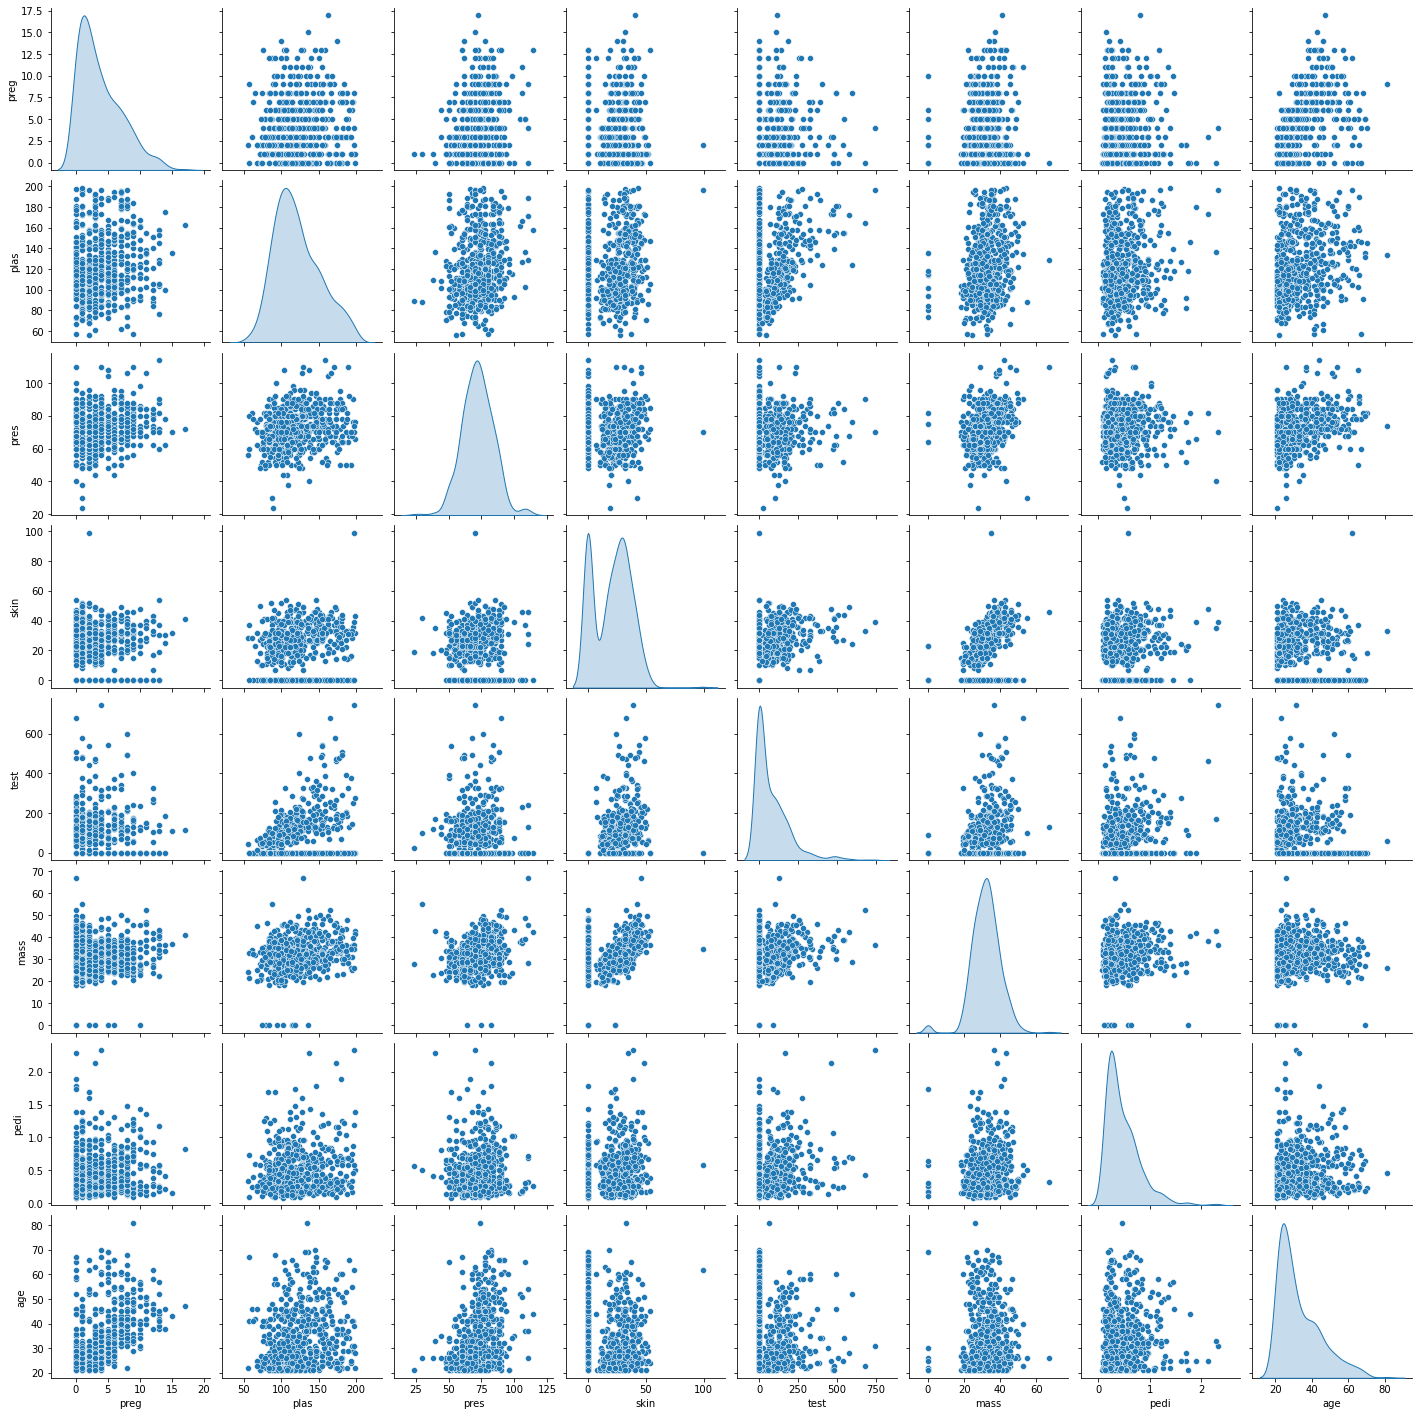

In [36]:
sns.pairplot(X_train,diag_kind='kde')

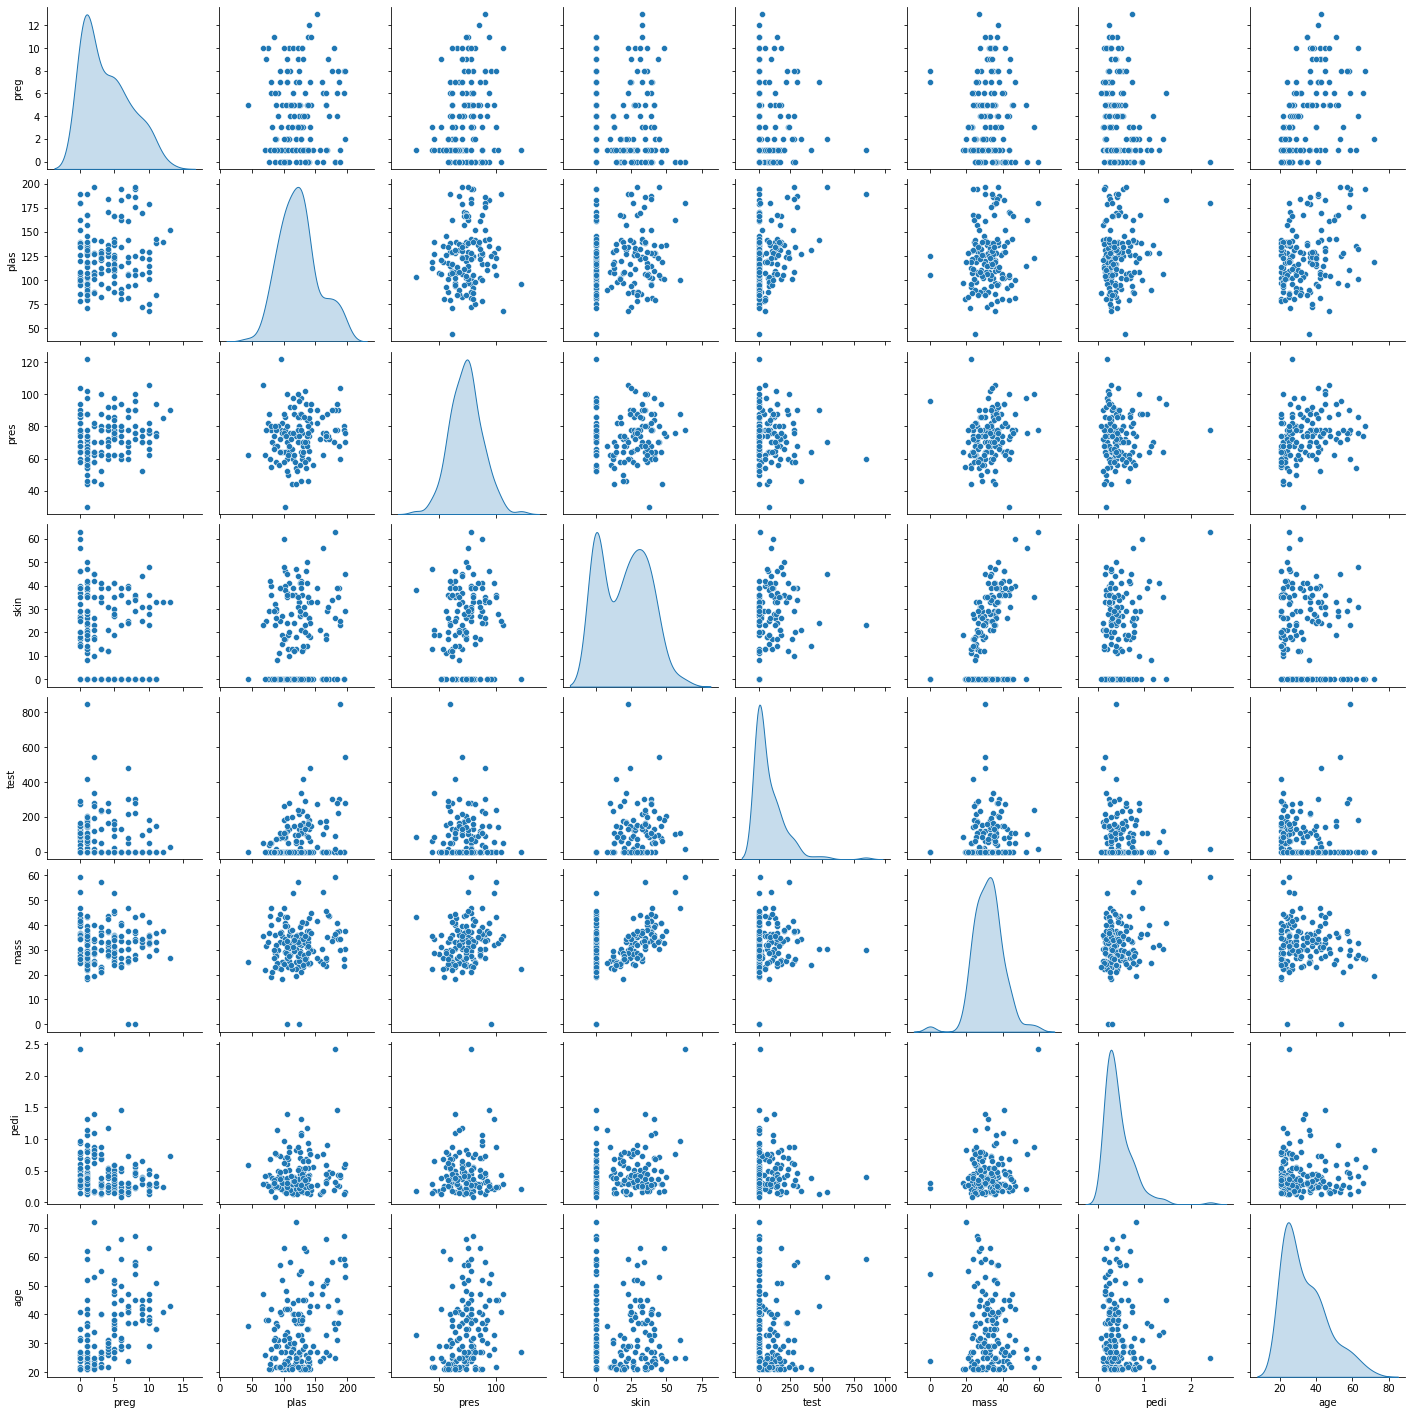

In [37]:
sns.pairplot(X_test,diag_kind='kde')

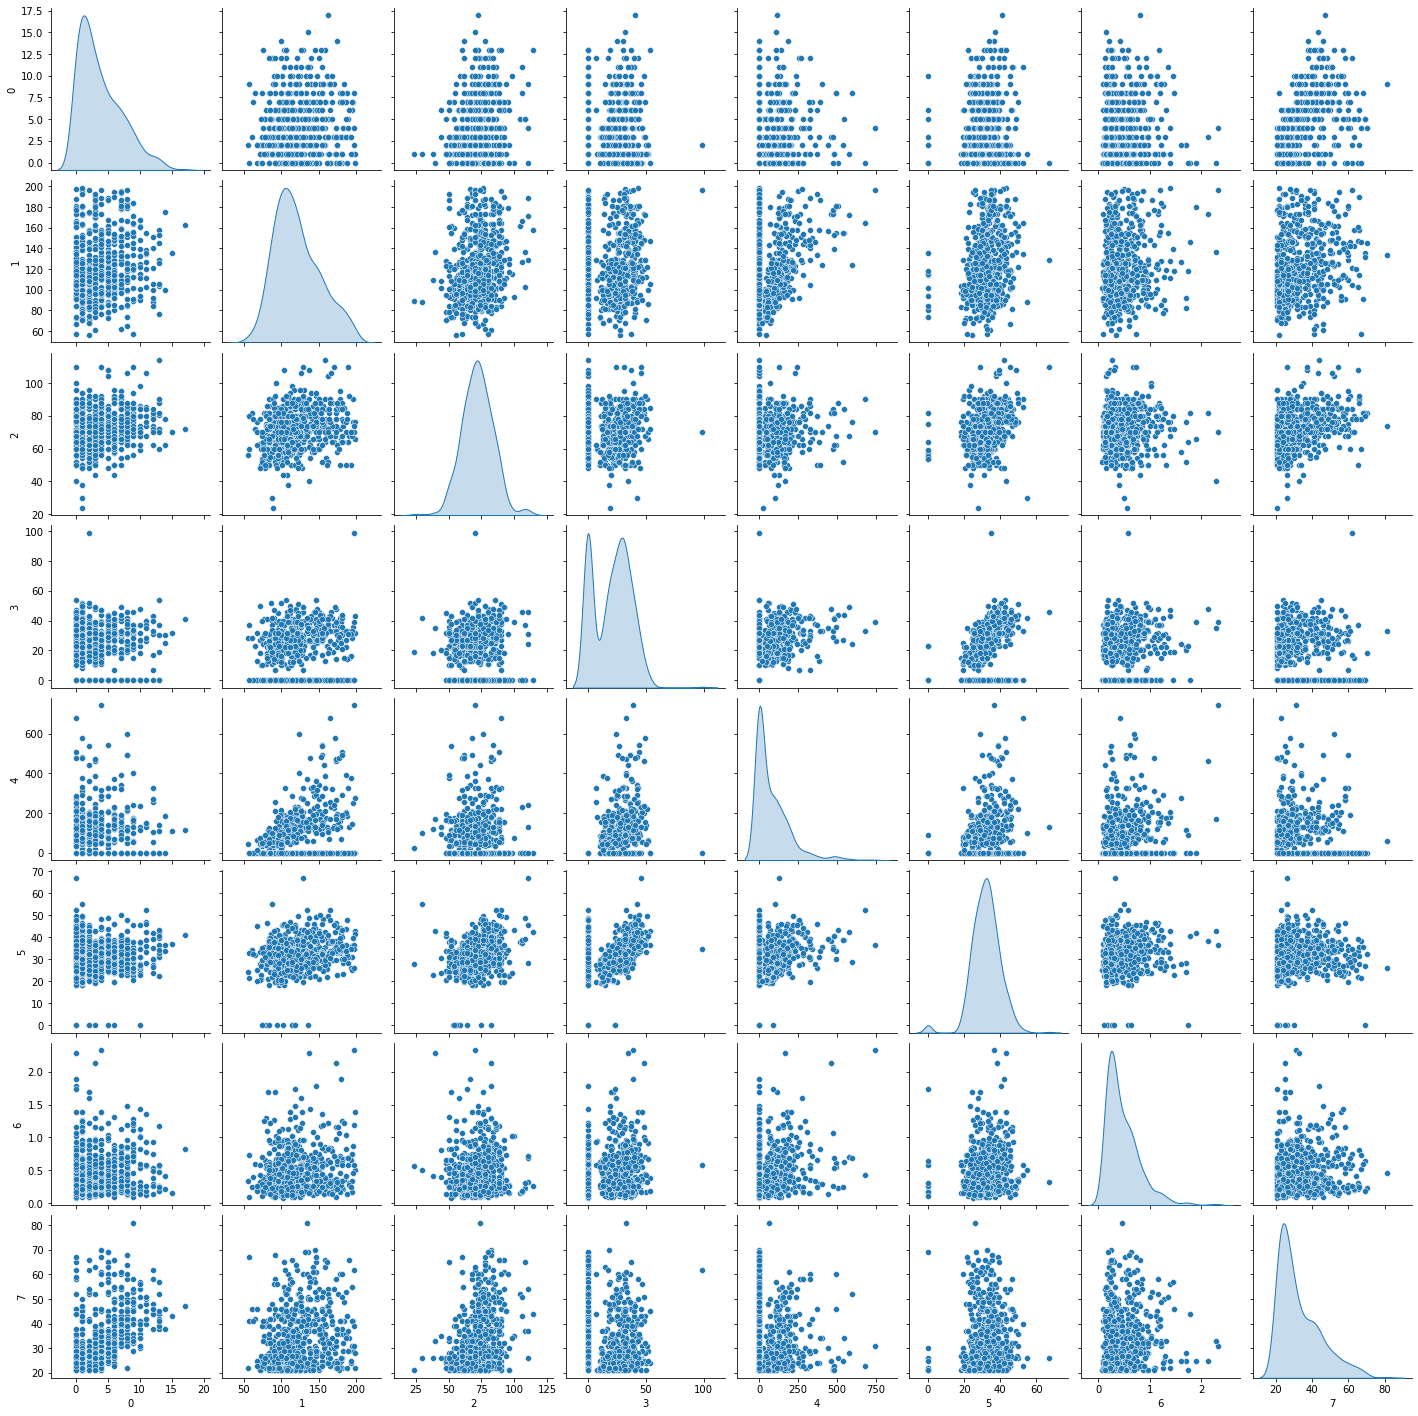

In [38]:
sns.pairplot(itXtrain,diag_kind='kde')

In [39]:
#Experimentation with KNN
# https://www.kaggle.com/uciml/pima-indians-diabetes-database
import pandas as pd
colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
demo = pd.read_csv("pima-indians-diabetes.data", names= colnames)
X=demo.drop('class',axis=1)
y=demo['class']
demo.head()

preg  plas  pres  skin  test  mass   pedi  age  class
0     6   148    72    35     0  33.6  0.627   50      1
1     1    85    66    29     0  26.6  0.351   31      0
2     8   183    64     0     0  23.3  0.672   32      1
3     1    89    66    23    94  28.1  0.167   21      0
4     0   137    40    35   168  43.1  2.288   33      1

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=20)
sc=StandardScaler()
scaledxtrain = sc.fit_transform(X_train)
scaledxtest = sc.transform(X_test)
lr = KNeighborsClassifier(n_neighbors=5)
lr.fit(scaledxtrain,y_train)
print("What is the Testing Accuracy")
print(lr.score(scaledxtest,y_test))
print("What is the Training Accuracy")
print(lr.score(scaledxtrain,y_train))

What is the Testing Accuracy
0.7727272727272727
What is the Training Accuracy
0.8192182410423453


In [41]:
#Before Scaling Poor Performance
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=20)
lr = KNeighborsClassifier(n_neighbors=5)
lr.fit(X_train,y_train)
print("What is the Testing Accuracy")
print(lr.score(X_test,y_test))
print("What is the Training Accuracy")
print(lr.score(X_train,y_train))

What is the Testing Accuracy
0.7337662337662337
What is the Training Accuracy
0.8078175895765473


In [42]:
#Experimentation with Ensembles
# https://www.kaggle.com/uciml/pima-indians-diabetes-database
import pandas as pd
colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
demo = pd.read_csv("pima-indians-diabetes.data", names= colnames)
X=demo.drop('class',axis=1)
y=demo['class']
demo.head()

preg  plas  pres  skin  test  mass   pedi  age  class
0     6   148    72    35     0  33.6  0.627   50      1
1     1    85    66    29     0  26.6  0.351   31      0
2     8   183    64     0     0  23.3  0.672   32      1
3     1    89    66    23    94  28.1  0.167   21      0
4     0   137    40    35   168  43.1  2.288   33      1

In [43]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=20)
lr = BaggingClassifier(n_estimators=2)
lr.fit(X_train,y_train)
print("What is the Testing Accuracy")
print(lr.score(X_test,y_test))
print("What is the Training Accuracy")
print(lr.score(X_train,y_train))

What is the Testing Accuracy
0.7532467532467533
What is the Training Accuracy
0.8778501628664495


In [44]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)
lr = RandomForestClassifier(n_estimators=20)
lr.fit(X_train,y_train)
print("What is the Testing Accuracy")
print(lr.score(X_test,y_test))
print("What is the Training Accuracy")
print(lr.score(X_train,y_train))

What is the Testing Accuracy
0.7597402597402597
What is the Training Accuracy
0.993485342019544


In [45]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)
lr = RandomForestClassifier(n_estimators=20)
lr.fit(X_train,y_train)
print("What is the Testing Accuracy")
print(lr.score(X_test,y_test))
print("What is the Training Accuracy")
print(lr.score(X_train,y_train))

What is the Testing Accuracy
0.7727272727272727
What is the Training Accuracy
0.996742671009772


In [46]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)
lr = AdaBoostClassifier(n_estimators=100)
lr.fit(X_train,y_train)
print("What is the Testing Accuracy")
print(lr.score(X_test,y_test))
print("What is the Training Accuracy")
print(lr.score(X_train,y_train))

What is the Testing Accuracy
0.7402597402597403
What is the Training Accuracy
0.8599348534201955


In [47]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)
lr = GradientBoostingClassifier(n_estimators=30)
lr.fit(X_train,y_train)
print("What is the Testing Accuracy")
print(lr.score(X_test,y_test))
print("What is the Training Accuracy")
print(lr.score(X_train,y_train))

What is the Testing Accuracy
0.7792207792207793
What is the Training Accuracy
0.8631921824104235


In [48]:
lr.predict_proba(X_test)

array([[0.50327279, 0.49672721],
       [0.82411576, 0.17588424],
       [0.84394847, 0.15605153],
       [0.77796132, 0.22203868],
       [0.60415322, 0.39584678],
       [0.50756173, 0.49243827],
       [0.94866109, 0.05133891],
       [0.35985704, 0.64014296],
       [0.44410895, 0.55589105],
       [0.42486688, 0.57513312],
       [0.67761277, 0.32238723],
       [0.17550834, 0.82449166],
       [0.6171977 , 0.3828023 ],
       [0.54760176, 0.45239824],
       [0.92903277, 0.07096723],
       [0.71746095, 0.28253905],
       [0.85065468, 0.14934532],
       [0.93343356, 0.06656644],
       [0.45977537, 0.54022463],
       [0.5952153 , 0.4047847 ],
       [0.62306385, 0.37693615],
       [0.86796887, 0.13203113],
       [0.6521256 , 0.3478744 ],
       [0.91605878, 0.08394122],
       [0.50101938, 0.49898062],
       [0.10270278, 0.89729722],
       [0.90947891, 0.09052109],
       [0.93956934, 0.06043066],
       [0.90236794, 0.09763206],
       [0.75041953, 0.24958047],
       [0.

Automatically created module for IPython interactive environment


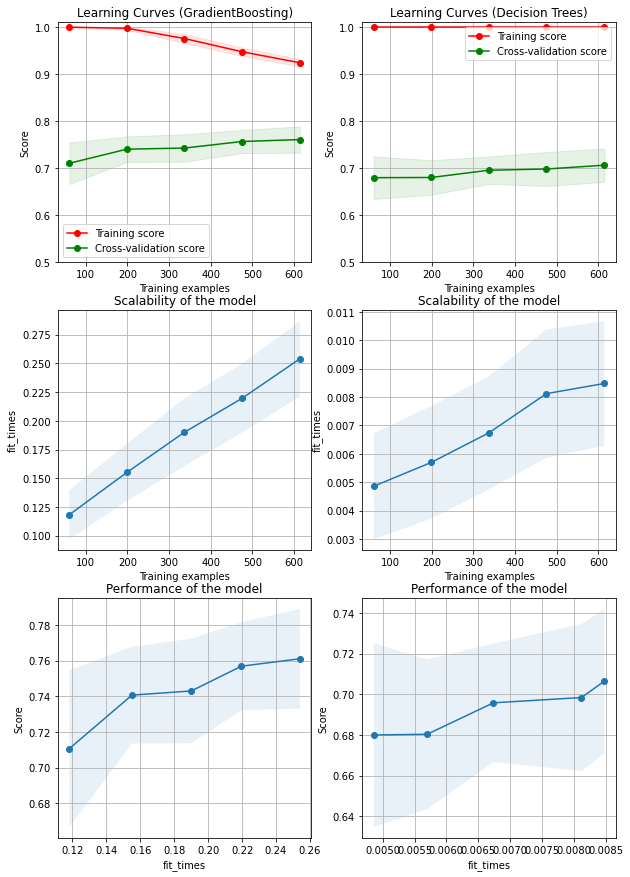

In [49]:
#Learning Curve Demo
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.tree import DecisionTreeClassifier

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(3, 2, figsize=(10, 15))

X=demo.drop('class',axis=1)
y=demo['class']

title = "Learning Curves (GradientBoosting)"
# Cross validation with 10 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)

estimator = GradientBoostingClassifier()
plot_learning_curve(estimator, title, X, y, axes=axes[:, 0], ylim=(0.5, 1.01),
                    cv=cv, n_jobs=4)

title = r"Learning Curves (Decision Trees)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
estimator = DecisionTreeClassifier()
plot_learning_curve(estimator, title, X, y, axes=axes[:, 1], ylim=(0.5, 1.01),
                    cv=cv, n_jobs=4)

plt.show()

In [50]:
#Validation Curve for GradientBoostingClassifier with respect to Number of Estimators
from sklearn.model_selection import validation_curve
X=demo.drop('class',axis=1)
y=demo['class']
train_scores, valid_scores = validation_curve(GradientBoostingClassifier(), X, y, "n_estimators",np.array([10,20,30,40,50,60,70,80,90,100]),cv=10)
print(train_scores)
print(valid_scores)

[[0.80173661 0.80318379 0.78581766 0.80463097 0.80463097 0.79884226
  0.78726483 0.79739508 0.80057803 0.7933526 ]
 [0.83212735 0.82344428 0.81765557 0.83068017 0.82778582 0.83068017
  0.82778582 0.81910275 0.82803468 0.82080925]
 [0.84515195 0.83791606 0.84081042 0.84515195 0.85094067 0.84081042
  0.83936324 0.83936324 0.84393064 0.8367052 ]
 [0.85672938 0.84949349 0.85672938 0.86107091 0.86396527 0.85962373
  0.86685962 0.85383502 0.85404624 0.85982659]
 [0.86685962 0.8683068  0.87264834 0.86975398 0.87698987 0.87409551
  0.8683068  0.86685962 0.87283237 0.8699422 ]
 [0.8813314  0.88422576 0.88422576 0.87698987 0.89146165 0.8813314
  0.87264834 0.87698987 0.87716763 0.87572254]
 [0.89435601 0.89869754 0.88856729 0.89146165 0.89290883 0.88856729
  0.87698987 0.88422576 0.8916185  0.89306358]
 [0.90738061 0.90303907 0.89580318 0.89580318 0.89869754 0.89146165
  0.89001447 0.89146165 0.9017341  0.89306358]
 [0.90303907 0.92185239 0.90593343 0.91027496 0.90593343 0.89580318
  0.90014472 

Automatically created module for IPython interactive environment


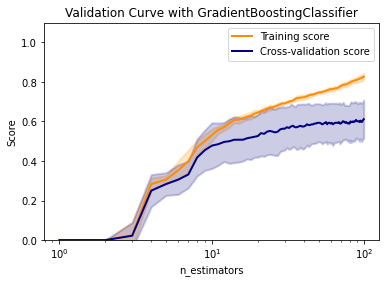

In [51]:
print(__doc__)

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import validation_curve

X=demo.drop('class',axis=1)
y=demo['class']

param_range = np.arange(1,100)
#param_range = np.array([30,35,40,45,50,55,60,65,70,75,80,90,100,105,110,115,120])
train_scores, test_scores = validation_curve(
    GradientBoostingClassifier(), X, y, param_name="n_estimators", param_range=param_range,
    scoring="recall", n_jobs=1,cv=10)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with GradientBoostingClassifier")
plt.xlabel(r"n_estimators")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()